In [5]:
import torch
from train import Trainer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def test(model, input_text, num_chars=1000, block_size=128, T = 1):
    """
    Generate a sequence of text by predicting characters iteratively.
    
    args:
    ---
        model: The trained model.
        input_text (str): Initial input text.
        num_chars (int): Number of characters to generate.
        block_size (int): Maximum context size for the model (e.g., 128).
    
    returns:
    --------
        str: The full generated text.
    """

    model.model.eval()
    input_sentence = input_text
    final_sentence = input_text

    with torch.no_grad():
        for _ in range(num_chars):

            input_indices = [model.dataset.stoi[char] for char in input_sentence]
            x_test = torch.tensor(input_indices).unsqueeze(0)  
            
            output = model.model(x_test)
            
            # predicted_index = torch.argmax(output[-1,:]).item()  
            proba = torch.softmax(output[0, -1, :], dim=-1) / T
            predicted_index = torch.multinomial(proba, 1).item()
            
            predicted_letter = [k for k, v_ in model.dataset.stoi.items() if v_ == predicted_index][0]
            
            final_sentence += predicted_letter
            input_sentence += predicted_letter
            
            if len(input_sentence) > block_size:
                input_sentence = input_sentence[-block_size:]

    return final_sentence


---

## Shakespeare dataset

Training Progress:  48%|████▊     | 2891/6000 [1:30:04<1:36:51,  1.87s/batch]


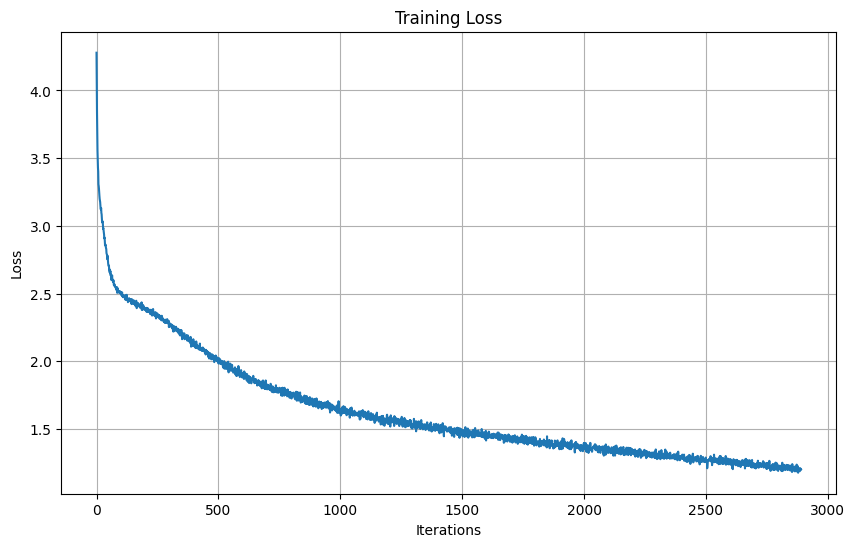

In [7]:
train = Trainer(datafile="../datasets/shakespeare-data-subset.txt", 
                block_size=128, 
                batch_size=128,
                dim_emb=512, 
                hidden_layer=128, 
                num_head=8, 
                num_transformer=8, 
                learning_rate=0.0001, 
                iteration=6000)

train.run()
train.save_model(path="../trained_models/shakespeare-model.pth")

plt.figure(figsize=(10, 6))
plt.plot(train.running_loss)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [9]:
# train = Trainer(datafile="../datasets/shakespeare-data-subset.txt", 
#                 block_size=128, 
#                 batch_size=128,
#                 dim_emb=512, 
#                 hidden_layer=128, 
#                 num_head=8, 
#                 num_transformer=8, 
#                 learning_rate=0.0001, 
#                 iteration=1000)

# train.load_model("../trained_models/shakespeare-model.pth")

initial_phrase = "First Citizen: "
generated_text = test(train, initial_phrase, num_chars=1000, block_size=128)

print(generated_text)

First Citizen: s'tis sendure's he bowester,
And let us thun is lists, and dream
I'll late but in me; by nor, what grows not to dity
From the notter suckles, no wore: but well,
But thou'd the part to't, where one i' the loss'd.

QUEEN MARGARET:
The carest not gone more than entge o' the state;
They fie, I would it prayer soutder: the common
We are at trult with Lartius grieves weeds,
Lest the traterest in the blequet'
Coriolanus.

All:
Do not, parting hath letts and they shall high
poot Catesby'd with Richmond and to hish-regaon
If extree of worthy gentle.
O, doublestimes trater her reveremed
If this dead we intent it poping to make,
Tust from to me loss with thee comploosu
Tell takest on the world it alok into true
Thy world i' thy pooting fire, this cenditation?
.u, which can my little power to found and
ars go to 't.

MORCIUS:
Why granteful of Plantarence, cannot shall curse
Of as he carry? 'now ampleads to choow of my counsergeht.

First Senator:
I set thou so fe-mull.

VOLUMNIA:
Th

---

## Jul Dataset

Training Progress: 1002batch [32:12,  1.93s/batch]                       


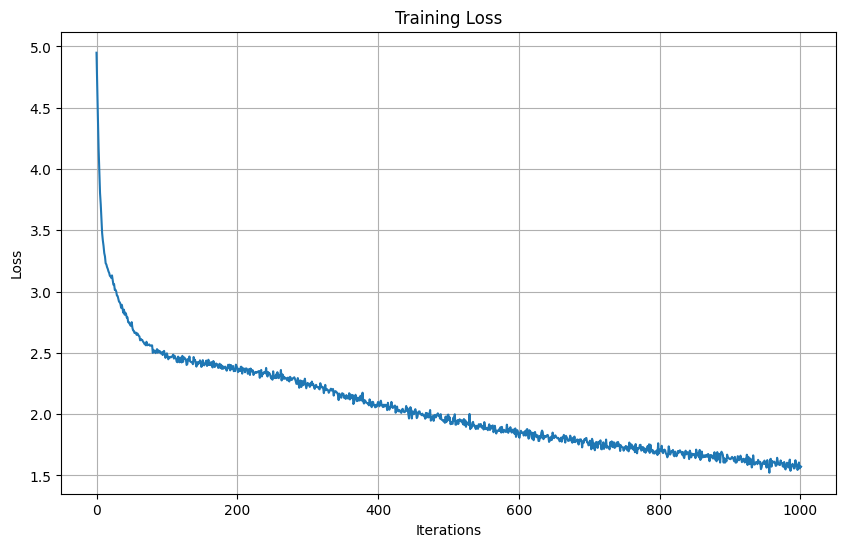

In [6]:
train_jul = Trainer(datafile="../datasets/jul-data-subset.txt", 
                block_size=128, 
                batch_size=128,
                dim_emb=512, 
                hidden_layer=128, 
                num_head=8, 
                num_transformer=8, 
                learning_rate=0.0001, 
                iteration = 1000)

train_jul.run()
train_jul.save_model(path="../trained_models/jul-model.pth")

plt.figure(figsize=(10, 6))
plt.plot(train_jul.running_loss)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [8]:
# train_jul = Trainer(datafile="jul-data.txt", 
#                 block_size=128, 
#                 batch_size=128,
#                 dim_emb=768, 
#                 hidden_layer=128, 
#                 num_head=8, 
#                 num_transformer=12, 
#                 learning_rate=0.0001, 
#                 iteration=6000)

# train_jul.load_model("jul-model.pth")

initial_phrase = "Wesh Alors "
generated_text = test(train_jul, initial_phrase, num_chars=1000, block_size=128)

print(generated_text)

Wesh Alors de lins
Papolenta, j'fais près l'perde
Cemmène est callayent tête te, vras noules et terre
Si Wroille, j'suis à la Willeuh, l'ourgaière j'fais ume au partard
J'y aux bitreng dans cais l'bovon, passour non pouser
Ce sont eut là Y
J'ai pas des iljossessé c'œurgandé à les p'tics as
J'suiraînnekanat
Taque, l'amout deppeurs, ça rend se samaille
Et bam, leur, t'es dépacaille
J'ai dafserants la (treen, homme)
Que, ests, des pohoirs, les blomés, touts les boulallesch
Et sortort un oupm, ça fait le nous moint moi
Sur c'est clérésséésor la Habonnat
Ça J tone Oh a banche, Et tous des quaqui sous vand'prendre lèveet
Dans la zéte, la comme 7 Juxétopors, BienLer, ça face me ta racha
Pappas, le sun, jepids moi, j'tu t'es dis, que j'm'es et venx gas, fallez sondair des soins, l)
Les haprinse dandes la beminteusse les clossés, j'suis la visurté c'est des
Y gors, mes vas leures ils sous l'sacyens, l'suigghe le peur la mère
Il en moien ranots, le ruilles, j'vère de liens Cait, cherrainque", ou